## Final Project - Brownian Motion
**By Mike Blanchard & Reilly Kobbe**

**Class: Computational Physics**

**Professor: Dr. Titus**

**Question:** How can we model Brownian Motion by simulating a pollen particle in water?

**Description**

For our final project, we wanted to investigate the movement of a pollen particle on the surface of water. More specifically, we wanted to model the affect that the water particles had on the pollen, on an X,Y plane. From this model, we would see how far the pollen particle was able to go and the path it took. Additionally, we wanted to see how changing the amount of particles in the water would affect the movement of the pollen particle. 


**Background**

Brownian motion is the phenomena of continuous, random flucuations on the microscopic level. Since these flucuations are random, there is no preferred direction for the flucuations. As a result, the more oscillations there are, the more the particles will be evenly distributed. 
    
Brownian motion was first discovered in 1827 by Robert Brown, the first scientist to study fluctuations. He discovered this phenomena while he was investiagating fertilization; he noticed a peculiar oscillating movement in the particles of a plant. He deemed this strange, as the plant was dead. Because of his finding, he decided to pursue research on this topic and found that the same phenomena occured in chips of glass, granite, and smoke.
    
Inspired by this idea, Albert Einstein decided to pursue further investigation. He wanted to see if the temperature of the substance is proportional to the average kinetic energy of the particles. In his findings, he was able to declare that a smaller particle, less viscous fluid, and a higher temperature would increase the amount of motion in the particles. 

In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pylab as py

<IPython.core.display.Javascript object>

In [2]:
N = 1000 #number of particles

**Random Walk**

The random walk is the method we used to model Brownian Motion. Although a random walk models a discrete system, it is still a valid way to visualize Brownian Motion. This method generates random coordinates on an X, Y plane which represents the unpreferred direction of the particles. Furthermore, a particle's location stems from the Monte Carlo Effect. The Monte Carlo Effect represents the random placement of particles. This is a theory used whenever there is an experiment that includes randomization.

One could envision the movement of the random walk like a tree. A particle will be "walking" down a discrete timeline. Once it comes into contact with another particle, the two particles will branch off of each other changing directions. 

In [3]:
#Look at relaionship between distance travled and number of step taken 

def randomwalk(N):
    x = np.zeros(N)
    y = np.zeros(N)
    
    #Declare compus to represent North, South, East, West
    for i in range(1,N):
        Compus = rand.randint(1,4)
        if Compus == 1:
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1]
        elif Compus == 2:
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1]
        elif Compus == 3:
            x[i] = x[i - 1]
            y[i] = y[i - 1] + 1
        else:
            x[i] = x[i - 1]
            y[i] = y[i - 1] - 1
            
    #ADD a Mark at the to see how far they traveled 

    py.title("Random Walk, Particles = " + str(N))
    plt.plot([0],[0],'y*', markersize=16)
    py.plot(x, y)
    py.show()

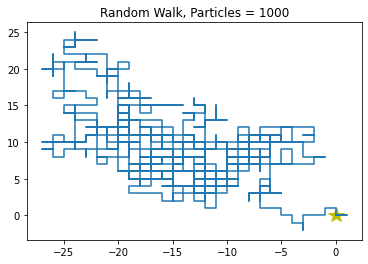

In [4]:
randomwalk(N)

**Taking a Closer Look**

Now that we have explained and modeled what Brownian Motion is, lets use a real example. 

As explained before, we wanted to simulate a pollen particle in water. In the model you will see multiple small red spheres and a large blue sphere. The red particles are simulating the water particle and the blue sphere is simulating the pollen particle. However, the significance of these particles is not just the size or color, it is their mass. By using acurate masses, each particle is able to move in a realistic manner. As you probably guessed, the water particles have an extreamly small mass compared to the pollen particle. This code was based off of our first project when we modeled an ideal gas. The primary differences are the differnet properties we added to the balls. Additionally, we added a distance equation to see how far the balled moves each time.

The way the model works is that each shpere is assigned to a random position. The water particles will move via Brownian Motion. The movement of the water particles will effect where the pollen particle goes. As a result, the movement of the pollen particle models Brownian Motion, as its path is totally random and can not be predicted. At the end of the simulation, we calculate the distance traveled. This is not to scale but to get a numerical sense of how far the ball travels given different parameters.

In [5]:
#constants
R = .1925 #Radius of water molecule (nanometers)
L = 80*R #length of box in m
thick = L/100 #thickness of box wall in m
k = 1.4e-23 #boltzmann constant
T = 300 #temp in K
particles = [] #list of particles
mass = [] #array of masses

In [6]:
def check_collisions(particlelist):
    pairs = [] #a list of pairs of spheres that are overlapping
    
    N = len(particlelist) #number of particles
    
    for i in range(N): #start on first particle (i)
        for j in range(i+1,N): #start on second particle (int after i)
            r1 = particlelist[i].pos
            r2 = particlelist[j].pos
            d = mag(r2-r1)
            if d < 2*R:
                pairs.append([i,j]) #store the pair of indicies        
    return pairs 

In [7]:
def calc_collision(i,j,particle):
    r1 = particles[i].pos
    r2 = particles[j].pos
    v1 = particles[i].v
    v2 = particles[j].v
    
    p1 = particle.m*v1
    p2 = particle.m*v2
    
    #transform to reference frame of particle 1
    v2rel = v2 - v1
    r2rel = r2 - r1
    
    #find time when collision ocurred
    dx = dot(r2rel, hat(v2rel))
    dy = mag(cross(r2rel, hat(v2rel)))
    
    if dy/2/R > -1 and dy/2/R < 1:
        alpha = asin(dy/2/R)
    else:
        alpha = 0
    d = 2*R*cos(alpha) + dx
    deltat = d/mag(v2rel)
    
    #move particles backward in time to their locations at the collision
    particles[i].pos = particles[i].pos - particles[i].v*deltat
    particles[j].pos = particles[j].pos - particles[j].v*deltat
    
    #calculate new momenta using CM reference frame
    r1 = particles[i].pos
    r2 = particles[j].pos
    M = 2*particle.m #total mass 
    ptot = p1+p2 #total momentum
    vcm = ptot/M
    v1rel = v1 - vcm
    v2rel = v2 - vcm
    p1rel = particle.m*v1rel
    p2rel = particle.m*v2rel
    r = r2 - r1
    p1rel = p1rel - 2*dot(p1rel,hat(r))*hat(r)
    p2rel = p2rel - 2*dot(p2rel,hat(r))*hat(r)
    v1rel = p1rel/particle.m
    v2rel = p2rel/particle.m
    v1 = vcm + v1rel
    v2 = vcm + v2rel
    particles[i].v = v1
    particles[j].v = v2

    #move particles forward in time to their locations at the end of the time step
    particles[i].pos = particles[i].pos + particles[i].v*deltat
    particles[j].pos = particles[j].pos + particles[j].v*deltat

In [8]:
def plot(N):
    scene1 = canvas(title="N Particles in a Box")

    #visual objects
    Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, 0), color=color.white)
    Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, 0), color=color.white)
    Bwall = box(pos = vec(0, -L/2, 0), size = vec(L, thick, 0), color=color.white)
    Twall = box(pos = vec(0, L/2, 0), size = vec(L, thick, 0), color=color.white)

    #create water molecules and pollen molecule
    for i in range(N):
        if i==0:
            particle = sphere(pos = vec(0,0,0), radius = 3*R, color = color.cyan, make_trail=True, trail_radius=0.3*R)
            particle.m = .0025 #mass of pollen particle
        else:
            particle = sphere(pos = L/2*vec(rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9),0), radius = R, color = color.red)
            particle.m = 2.99e-23 #mass of a water particle
            
        #initial velocity and momentum
        s = np.sqrt(2*3/2*k*T/particle.m) #initial speeds
        particle.v = s*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), 0))

        particles.append(particle)

    pairs = check_collisions(particles)

    while len(pairs) > 0: #repeat proccess until no pairs
        for pair in pairs:
            i = pair[0]
            j = pair[1]
            
            #if particles[i] == particles[0] or particles[j] == particles[0]:
                #particles[0].pos = L/2*vec(0,0,0)
            
            particles[i].pos = L/2*vec(rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9),0)
            particles[j].pos = L/2*vec(rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9),0)
        
        particles[0].pos = L/2*vec(0,0,0)
        pairs = check_collisions(particles)

    scene1.pause()
    #time
    t = 0
    dt = R/s/10
    #Nsteps = 3e4 #number of time steps for the loop   
    Nsteps = 3000
    
    #start = particles[0].pos.x + particles[0].pos.y
    #print("Original Distance Traveled:", start)
    
    distTrav = 0
    dPos = 0
    y1 = 0
    x1 = 0
    
    while t < Nsteps*dt:
    #while t < 10:
        rate(1000) #sets number of loops per second in order to slow down or speed up visualization

        #update position of each particle
        for particle in particles:
            particle.pos = particle.pos + particle.v*dt

        #Handle Collisions
        pairs = check_collisions(particles)
        for pair in pairs:
            i = pair[0]
            j = pair[1]
            calc_collision(i,j,particle)

        #handle collision with walls
        for particle in particles:
            if particle.pos.x > L/2:
                particle.v.x = - abs(particle.v.x)
            elif particle.pos.x < -L/2:
                particle.v.x = abs(particle.v.x)

            if particle.pos.y > L/2:
                particle.v.y = - abs(particle.v.y)
            elif particle.pos.y < -L/2:
                particle.v.y = abs(particle.v.y)

            if particle.pos.z > L/2:
                particle.v.z = - abs(particle.v.z)
            elif particle.pos.z < -L/2:
                particle.v.z = abs(particle.v.z)

        t = t + dt

        y2 = particles[0].pos.y
        x2 = particles[0].pos.x
        dy = (y2-y1)**2
        dx = (x2-x1)**2
        
        dpos = np.sqrt(dy+dx)
        y1 = y2
        x1 = x2
        
        distTrav = distTrav + dpos
         
    print("Final Distance Traveled:", distTrav)

**About The Graph**

Theoretically, the graph should show the pollen particle moving around randomly based on the Brownian Motion. Since the number of particles strictly correlates to how fast the pollen molecule is moving, we decided to start with several pollen molecules no smaller than 50. We also decided to have the rate at which the pollen molecules move set to one thousand. 

In the code above, check_collision is used to help determine all the pairs that have collided with each other in the sphere array. It then returns those pairs of collided atoms and molecules.

calc_collision determines if the molecules or atoms collide with the wall or another particle. It calculates the velocity, momentum, and position in which the collision took place. This is important as it helps us keep track of what the pollen molecule has collided with. 

We believe that the more water molecules there are the faster the Pollen molecule will move.

In [9]:
plot(150)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final Distance Traveled: 50.415880194928945


**Conclusion**

After creating and studying the model, we noticed that the more water particles there are, the shorter the distance the pollen travels. Although water particles stay consistent, this was a good model to see the relationship between the two varaibles. Additionally, we made the conclusion that the model definatley supports Brownian Motion, as the path of the ball was different each time. All in all, Brownian Motion is a fascinating subject. It may seem like a simple concept, but it can be very interesting when you begin to apply the idea to real life models, such as this one.